# Get the genes overlapping the important tokens for SAUR

In [1]:
import pandas as pd


pd.set_option("display.max_columns", None) # show all cols
pd.set_option('display.max_colwidth', None) # show full width of showing cols
pd.set_option("display.expand_frame_repr", False) # print cols side by side as it's supposed to be

## Read bed files containing tokens

In [2]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files', 'SAUR')

bedDfList = []
for bedFile in os.listdir(bedDir):
    tubeid = bedFile.split('.')[0].split('_')[0]
    tokensDf = pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score'])
    tokensDf['tube_id'] = tubeid
    bedDfList.append(tokensDf)

bedDf = pd.concat(bedDfList, ignore_index=True)
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id
0,1,0,6,TTTTCTT,0.000064,ALF22G140
1,1,7,9,ACC,-0.000395,ALF22G140
2,1,10,13,GACA,0.001573,ALF22G140
3,1,14,18,AGAAT,-0.000986,ALF22G140
4,1,19,25,TAATTAT,0.000795,ALF22G140
...,...,...,...,...,...,...
176721937,5,181665,181667,CGG,-0.002273,AH21C044
176721938,5,181668,181673,CTCATC,-0.001735,AH21C044
176721939,5,181674,181676,GCA,-0.003468,AH21C044
176721940,5,181677,181680,TCCA,-0.000228,AH21C044


## Calculate token lengths

In [3]:
bedDf['token_length'] = bedDf.tokens.apply(lambda x: len(x))
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
0,1,0,6,TTTTCTT,0.000064,ALF22G140,7
1,1,7,9,ACC,-0.000395,ALF22G140,3
2,1,10,13,GACA,0.001573,ALF22G140,4
3,1,14,18,AGAAT,-0.000986,ALF22G140,5
4,1,19,25,TAATTAT,0.000795,ALF22G140,7
...,...,...,...,...,...,...,...
176721937,5,181665,181667,CGG,-0.002273,AH21C044,3
176721938,5,181668,181673,CTCATC,-0.001735,AH21C044,6
176721939,5,181674,181676,GCA,-0.003468,AH21C044,3
176721940,5,181677,181680,TCCA,-0.000228,AH21C044,4


## Calculate counts of token lengths

In [4]:
tokenlengthCountDf = bedDf.token_length.value_counts().reset_index().sort_values(by=['token_length'], ascending=True)
tokenlengthCountDf

,token_length,count
8,1,369058
6,2,3503389
4,3,10246519
3,4,18476852
0,5,54107814
1,6,49067795
2,7,31028269
5,8,8209701
7,9,1528839
9,10,167582


## Plot counts of token lengths

<Axes: xlabel='token_length', ylabel='count'>

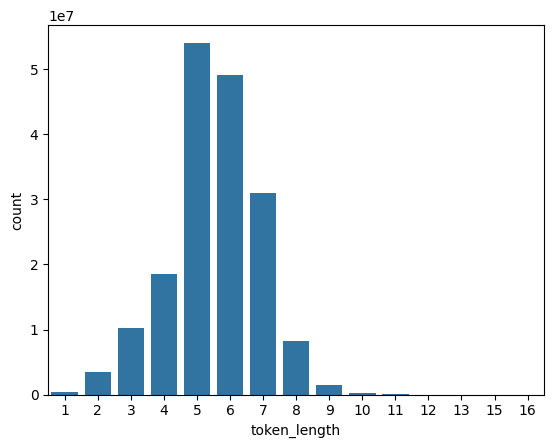

In [5]:
import seaborn as sns

sns.barplot(tokenlengthCountDf, x='token_length', y='count')

## Remove smaller tokens from this analysis

In [6]:
tokensDf = bedDf[bedDf.token_length > 7]
tokensDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
5,1,26,33,ACATTTTA,-0.001651,ALF22G140,8
6,1,34,41,TTAACATT,0.000632,ALF22G140,8
15,1,86,93,TTATTTCT,-0.000625,ALF22G140,8
25,1,145,152,AAACTGCT,0.000009,ALF22G140,8
28,1,163,170,AAAAATTA,-0.000348,ALF22G140,8
...,...,...,...,...,...,...,...
176721851,5,181181,181188,AAAGAAAT,-0.001212,AH21C044,8
176721879,5,181336,181343,TCAAAATA,-0.002324,AH21C044,8
176721896,5,181430,181437,AATATTTA,0.000577,AH21C044,8
176721915,5,181548,181556,TTTACATTT,-0.003486,AH21C044,9


## Plot attribution score distribution

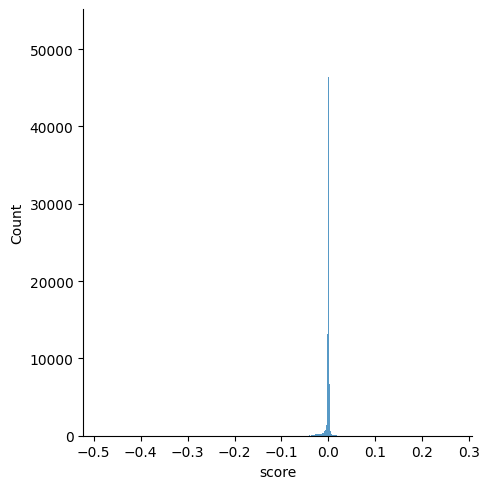

In [7]:
import seaborn as sns


sns.displot(tokensDf.score)

## Plot attribution score distribution (Zoomed)

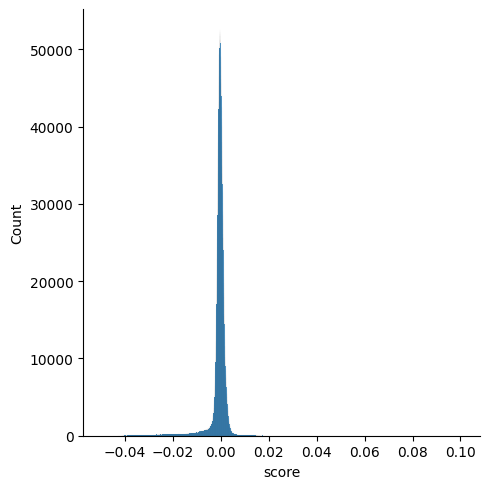

In [8]:
import seaborn as sns


sns.displot(tokensDf[(tokensDf.score > -0.05) & (tokensDf.score < 0.15)].score)

## Obtain the number of tokens whose attribution score is over the cut-off

In [9]:
signatureTokens = list(tokensDf.sort_values(by=['score'], ascending=False).tokens.unique()[:10])

len(signatureTokens)

10

## Display the top tokens whose attribution score is over the cut-off

In [10]:
signatureTokens

['TGATTTTT',
 'TATACTTT',
 'CTTTCTTTT',
 'TTTATTTTT',
 'ATTTCTTT',
 'AAAAATAA',
 'AAGAAAAAAA',
 'GCCACCACA',
 'TATTTTTT',
 'AGAAGAAA']

## Overlaps with annotations

### Read token overlaps with annotations

In [11]:
import os
import pandas as pd
from pathlib import Path


overlappingFilesDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'overlapping_with_annotations', 'SAUR')

overlappingDfList = []
for overlappingFile in os.listdir(overlappingFilesDir):
    df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
    df['tube_code'] = [overlappingFile.split('_')[0]]*df.shape[0]
    overlappingDfList.append(df)
overlappingDf = pd.concat(overlappingDfList, ignore_index=True)
overlappingDf


/tmp/ipykernel_17305/3874131278.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
/tmp/ipykernel_17305/3874131278.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
/tmp/ipykernel_17305/3874131278.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'at

,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code
0,1,127,130,AAAA,-0.004951,CDS,OILJNO_00005,acyl carrier protein,acpP,"ID=OILJNO_00005;Name=acyl carrier protein;locus_tag=OILJNO_00005;product=acyl carrier protein;Dbxref=GO:0000036,GO:0005737,GO:0046677,RefSeq:WP_000426914.1,SO:0001217,UniParc:UPI0000125385,UniRef:UniRef100_A7X1J8,UniRef:UniRef50_A7X1J8,UniRef:UniRef90_A7X1J8;gene=acpP",AH20I016
1,1,131,134,TTTC,-0.000510,CDS,OILJNO_00005,acyl carrier protein,acpP,"ID=OILJNO_00005;Name=acyl carrier protein;locus_tag=OILJNO_00005;product=acyl carrier protein;Dbxref=GO:0000036,GO:0005737,GO:0046677,RefSeq:WP_000426914.1,SO:0001217,UniParc:UPI0000125385,UniRef:UniRef100_A7X1J8,UniRef:UniRef50_A7X1J8,UniRef:UniRef90_A7X1J8;gene=acpP",AH20I016
2,1,135,137,GAT,-0.009607,CDS,OILJNO_00005,acyl carrier protein,acpP,"ID=OILJNO_00005;Name=acyl carrier protein;locus_tag=OILJNO_00005;product=acyl carrier protein;Dbxref=GO:0000036,GO:0005737,GO:0046677,RefSeq:WP_000426914.1,SO:0001217,UniParc:UPI0000125385,UniRef:UniRef100_A7X1J8,UniRef:UniRef50_A7X1J8,UniRef:UniRef90_A7X1J8;gene=acpP",AH20I016
3,1,138,145,AAAGTAAA,0.009005,CDS,OILJNO_00005,acyl carrier protein,acpP,"ID=OILJNO_00005;Name=acyl carrier protein;locus_tag=OILJNO_00005;product=acyl carrier protein;Dbxref=GO:0000036,GO:0005737,GO:0046677,RefSeq:WP_000426914.1,SO:0001217,UniParc:UPI0000125385,UniRef:UniRef100_A7X1J8,UniRef:UniRef50_A7X1J8,UniRef:UniRef90_A7X1J8;gene=acpP",AH20I016
4,1,146,151,AGATAT,-0.010377,CDS,OILJNO_00005,acyl carrier protein,acpP,"ID=OILJNO_00005;Name=acyl carrier protein;locus_tag=OILJNO_00005;product=acyl carrier protein;Dbxref=GO:0000036,GO:0005737,GO:0046677,RefSeq:WP_000426914.1,SO:0001217,UniParc:UPI0000125385,UniRef:UniRef100_A7X1J8,UniRef:UniRef50_A7X1J8,UniRef:UniRef90_A7X1J8;gene=acpP",AH20I016
...,...,...,...,...,...,...,...,...,...,...,...
136910729,5,205776,205781,ATTTTT,-0.002056,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase,pulO,"ID=KKIOAG_10525;Name=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;locus_tag=KKIOAG_10525;product=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;Dbxref=COG:COG1989,COG:NU,RefSeq:WP_000261111.1,SO:0001217,UniParc:UPI0001DDA595,UniRef:UniRef100_A0A0D1JKS9,UniRef:UniRef50_A0A0D1JKS9,UniRef:UniRef90_A0A0D1JKS9;gene=pulO",AH21K020
136910730,5,205782,205787,AGGAGG,0.000008,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase,pulO,"ID=KKIOAG_10525;Name=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;locus_tag=KKIOAG_10525;product=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;Dbxref=COG:COG1989,COG:NU,RefSeq:WP_000261111.1,SO:0001217,UniParc:UPI0001DDA595,UniRef:UniRef100_A0A0D1JKS9,UniRef:UniRef50_A0A0D1JKS9,UniRef:UniRef90_A0A0D1JKS9;gene=pulO",AH21K020
136910731,5,205788,205790,CGT,-0.002779,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase,pulO,"ID=KKIOAG_10525;Name=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;locus_tag=KKIOAG_10525;product=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;Dbxref=COG:COG1989,COG:NU,RefSeq:WP_000261111.1,SO:0001217,UniParc:UPI0001DDA595,UniRef:UniRef100_A0A0D1JKS9,UniRef:UniRef50_A0A0D1JKS9,UniRef:UniRef90_A0A0D1JKS9;gene=pulO",AH21K020
136910732,5,205791,205798,ATATTTTT,-0.000752,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase,pulO,"ID=KKIOAG_10525;Name=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;locus_tag=KKIOAG_10525;product=Prepilin signal peptidase PulO (type II secretory pathway) or related peptidase;Dbxref=COG:COG1989,COG:NU,RefSeq:WP_000261111.1,SO:0001217,UniParc:UPI0001DDA595,UniRef:UniRef100_A0A0D1JKS9,UniRef:UniRe

### Get annotation overlaps for signature tokens

In [12]:
import pandas as pd


tokenOverlapsDfs = []
for signatureToken in signatureTokens:
    tokenOverlapsDf = overlappingDf[overlappingDf.tokens == signatureToken]
    tokenOverlapsDfs.append(tokenOverlapsDf)
finalTokenOverlapsDf = pd.concat(tokenOverlapsDfs, ignore_index=True)
finalTokenOverlapsDf

,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code
0,1,7506,7513,TGATTTTT,0.002100,CDS,OILJNO_00030,signal recognition particle protein,ffh,"ID=OILJNO_00030;Name=signal recognition particle protein;locus_tag=OILJNO_00030;product=signal recognition particle protein;Dbxref=COG:COG0541,COG:U,EC:3.6.5.4,KEGG:K03106,RefSeq:WP_000863479.1,SO:0001217,UniParc:UPI00000D9DA6,UniRef:UniRef100_T1YA10,UniRef:UniRef50_Q54431,UniRef:UniRef90_A0A7Z7VY64;gene=ffh",AH20I016
1,1,18996,19003,TGATTTTT,0.002908,CDS,OILJNO_00085,putative cell wall hydrolase LytN,lytN,"ID=OILJNO_00085;Name=putative cell wall hydrolase LytN;locus_tag=OILJNO_00085;product=putative cell wall hydrolase LytN;Dbxref=COG:COG1388,COG:M,EC:3.-.-.-,GO:0005576,GO:0016787,GO:0071555,RefSeq:WP_001041666.1,SO:0001217,UniParc:UPI00000D76C5,UniRef:UniRef100_Q99UM3,UniRef:UniRef50_Q9ZNI1,UniRef:UniRef90_Q9ZNI1;gene=lytN",AH20I016
2,1,131101,131108,TGATTTTT,0.003675,CDS,OILJNO_00620,Nuclease SbcCD subunit C,sbcC,"ID=OILJNO_00620;Name=Nuclease SbcCD subunit C;locus_tag=OILJNO_00620;product=Nuclease SbcCD subunit C;Dbxref=COG:COG0419,COG:L,GO:0004519,GO:0004527,GO:0005524,GO:0006260,GO:0006310,GO:0140664,SO:0001217,UniRef:UniRef50_Q2FYT3,UniRef:UniRef90_Q2FYT3;gene=sbcC",AH20I016
3,1,180456,180463,TGATTTTT,-0.002580,CDS,OILJNO_00835,Phosphate-binding protein PstS,pstS,"ID=OILJNO_00835;Name=Phosphate-binding protein PstS;locus_tag=OILJNO_00835;product=Phosphate-binding protein PstS;Dbxref=COG:COG0226,COG:P,GO:0005886,GO:0006817,GO:0042301,RefSeq:WP_000759229.1,SO:0001217,UniParc:UPI0001AE9BF9,UniRef:UniRef100_A0A6B5JPT4,UniRef:UniRef50_Q49XJ1,UniRef:UniRef90_Q2FH48;gene=pstS",AH20I016
4,1,204806,204813,TGATTTTT,0.001758,CDS,OILJNO_00950,2-oxoglutarate dehydrogenase E1 component,odhA,"ID=OILJNO_00950;Name=2-oxoglutarate dehydrogenase E1 component;locus_tag=OILJNO_00950;product=2-oxoglutarate dehydrogenase E1 component;Dbxref=COG:C,COG:COG0567,EC:1.2.4.2,GO:0004591,GO:0005829,GO:0006096,GO:0006099,GO:0030976,GO:0045252,RefSeq:WP_000180674.1,SO:0001217,UniParc:UPI0002B0093E,UniRef:UniRef100_UPI0002B0093E,UniRef:UniRef50_P0C601,UniRef:UniRef90_P0C601;gene=odhA",AH20I016
...,...,...,...,...,...,...,...,...,...,...,...
191880,5,102805,102812,AGAAGAAA,-0.001930,CDS,KKIOAG_10125,UPF0354 protein SAOUHSC_01859,ytpQ,"ID=KKIOAG_10125;Name=UPF0354 protein SAOUHSC_01859;locus_tag=KKIOAG_10125;product=UPF0354 protein SAOUHSC_01859;Dbxref=COG:COG4848,COG:R,RefSeq:WP_001091387.1,SO:0001217,UniParc:UPI00000CAE0C,UniRef:UniRef100_Q7A528,UniRef:UniRef50_Q49YH4,UniRef:UniRef90_Q7A528;gene=ytpQ",AH21K020
191881,5,125914,125921,AGAAGAAA,0.001663,CDS,KKIOAG_10200,tyrosine--tRNA ligase,tyrS,"ID=KKIOAG_10200;Name=tyrosine--tRNA ligase;locus_tag=KKIOAG_10200;product=tyrosine--tRNA ligase;Dbxref=COG:COG0162,COG:J,EC:6.1.1.1,GO:0003723,GO:0004831,GO:0005524,GO:0005737,GO:0006437,RefSeq:WP_072491689.1,SO:0001217,UniParc:UPI00091490BD,UniRef:UniRef100_UPI00091490BD,UniRef:UniRef50_Q88TV5,UniRef:UniRef90_Q5HF45;gene=tyrS",AH21K020
191882,5,174264,174271,AGAAGAAA,0.019841,CDS,KKIOAG_10390,DNA polymerase I,polA,"ID=KKIOAG_10390;Name=DNA polymerase I;locus_tag=KKIOAG_10390;product=DNA polymerase I;Dbxref=COG:COG0749,COG:L,RefSeq:WP_001038315.1,SO:0001217,UniParc:UPI0001DA2278,UniRef:UniRef100_UPI0001DA2278,UniRef:UniRef50_A0A7Z7QPQ9,UniRef:UniRef90_Q9RMM6;gene=polA",AH21K020
191883,5,176586,176593,AGAAGAAA,0.000650,CDS,KKIOAG_10400,dephospho-CoA kinase,coaE,"ID=KKIOAG_10400;Name=dephospho-CoA kinase;locus_tag=KKIOAG_10400;product=dephospho-CoA kinase;Dbxref=COG:COG0237,COG:H,EC:2.7.1.24,GO:0004140,GO:0005524,GO:0005737,GO:0015937,GO:0016310,KEGG:K00859,RefSeq:WP_001127167.1,SO:0001217,UniParc:UPI0000127CF3,UniRef:UniRef100_Q2FG49,UniRef:UniRef50_Q49YB9,UniRef:UniRef90_Q2FG49;gene=coaE",AH21K020


### Explore annotation overlaps for signature tokens

In [13]:
overlapCountsDf = finalTokenOverlapsDf.groupby(by=['tokens', 'name', 'feature_type']).agg({'contig_id': 'count'}).reset_index().sort_values(by='contig_id', ascending=False)
overlapCountsDf

,tokens,name,feature_type,contig_id
216,AAAAATAA,Exported protein,CDS,917
711,AAAAATAA,putative arabinose efflux permease AraJ%2C MFS family,CDS,768
185,AAAAATAA,DUF443 domain-containing protein,CDS,707
509,AAAAATAA,Thioester reductase domain of alpha aminoadipate reductase Lys2 and NRPSs,CDS,649
149,AAAAATAA,DNA-binding transcriptional regulator%2C LysR family,CDS,489
...,...,...,...,...
834,AAGAAAAAAA,Uncharacterized protein MW0361,CDS,1
840,AAGAAAAAAA,histidine kinase GraS/ApsS,CDS,1
842,AAGAAAAAAA,lysostaphin,CDS,1
843,AAGAAAAAAA,multidrug efflux MFS transporter MdeA,CDS,1


### Save annotation overlaps for signature tokens

In [14]:
import os

from pathlib import Path


overlapCountsDf.to_csv(Path(os.environ['GENOMICS_DATA_BASE'], 'survival_analysis', 'SAUR', 'annotation_overlap_counts_tl7.csv'), index=False)